In [23]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import biosppy
import matplotlib.pyplot as plt
import h5py

def detect_qrs_peaks(ecg_signal, sampling_rate=1000, method='biosppy'):
    """
    Detect QRS peaks in an ECG signal.

    Parameters:
    - ecg_signal (numpy array): ECG signal.
    - sampling_rate (int): Sampling rate of the ECG signal.
    - method (str): Method for QRS detection. Options: 'biosppy', 'scipy'.

    Returns:
    - detected_peaks (numpy array): Indices of the detected QRS peaks.
    """
    if method == 'biosppy':
        rpeaks = biosppy.signals.ecg.ecg(signal=ecg_signal, sampling_rate=sampling_rate)['rpeaks']
    elif method == 'scipy':
        rpeaks, _ = find_peaks(ecg_signal, height=0.2, distance=sampling_rate / 2)
    else:
        raise ValueError("Invalid QRS detection method. Use 'biosppy' or 'scipy'.")

    return np.array(rpeaks)

# Exemplo de uso:
# Suponha que você tenha um sinal de ECG chamado 'ecg_signal' e uma taxa de amostragem de 1000 Hz.
# detected_peaks = detect_qrs_peaks(ecg_signal, sampling_rate=1000, method='biosppy')


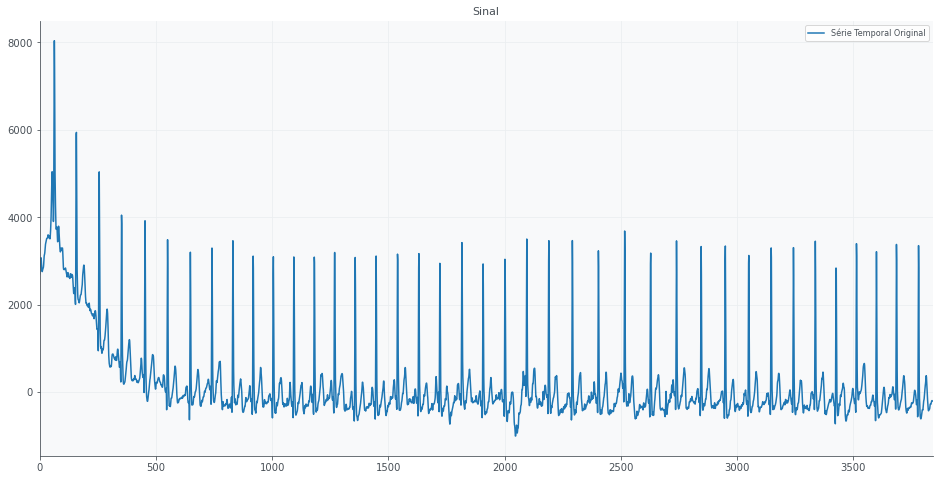

In [2]:
diretorio = 'D:/usuarios/estela.ribeiro/laudos/'
filename = '1j400008.h5'

# Open ECG - Movesense signal
f = h5py.File(diretorio + filename, "r")
signal = f['w_signal'][0]

# Sampling frequency
fs=128

# Plot
plt.figure(figsize=(16, 8))
plt.plot(signal, label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(signal))
plt.title('Sinal')
plt.legend()
plt.show()

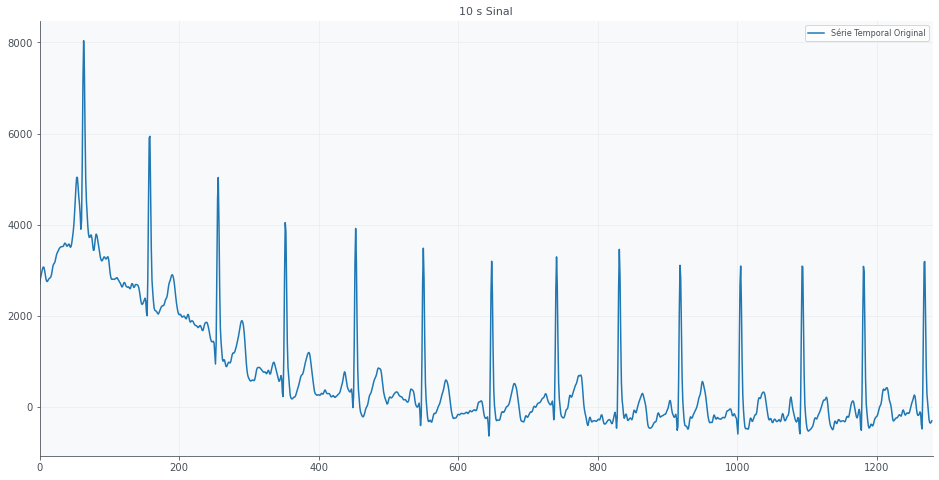

In [8]:
# Trim signal to 10 s (1280 samples)
cut_signal = signal[:1280].reshape(-1,1280,1)

ecg_signal = cut_signal[0]


plt.figure(figsize=(16, 8))
plt.plot(ecg_signal, label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(ecg_signal))
plt.title('10 s Sinal')
plt.legend()
plt.show()

In [24]:
# Aplicação
detected_peaks = detect_qrs_peaks(ecg_signal[:,0], sampling_rate=fs, method='scipy')
detected_peaks

array([  63,  158,  256,  352,  453,  550,  648,  741,  831,  918, 1005,
       1093, 1181, 1269], dtype=int64)

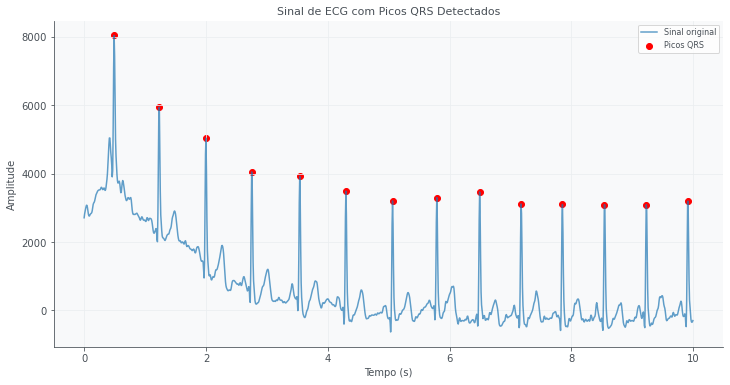

In [25]:
duration = 10 # tamanho do sinal em segundos
t = np.arange(0, duration, 1/fs) 

# Plotar os sinais original e filtrado com os picos QRS detectados
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, label='Sinal original', alpha=0.7)
plt.scatter(t[detected_peaks], ecg_signal[detected_peaks], color='red', marker='o', label='Picos QRS')
plt.title('Sinal de ECG com Picos QRS Detectados')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

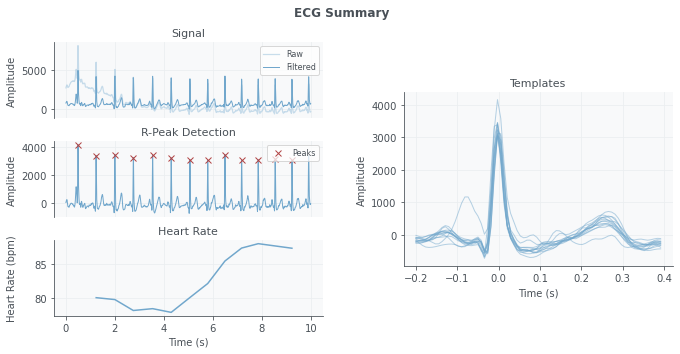

array([  63,  158,  256,  352,  453,  550,  648,  741,  831,  918, 1005,
       1093, 1181])

In [26]:
# Aplicação
detected_peaks = detect_qrs_peaks(ecg_signal[:,0], sampling_rate=fs, method='biosppy')
detected_peaks

In [ ]:
# Plotar os sinais original e filtrado com os picos QRS detectados
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, label='Sinal original', alpha=0.7)
plt.scatter(t[detected_peaks], ecg_signal[detected_peaks], color='red', marker='o', label='Picos QRS')
plt.title('Sinal de ECG com Picos QRS Detectados')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()